In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv("C://Users//POPO//Desktop//train.csv")
test=pd.read_csv("C://Users//POPO//Desktop//test.csv")
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

# [資料來源](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

# [欄位敘述](https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/205873/data_description.txt?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1555035251&Signature=FIdhckyE%2Bh9nF8rMWmuhLUyMyxGDwrmyUrY80tF74mTBNmAY7cojxJQXs8U%2FRtzCix2XqB1aXgzCEL9H1OkLs8Vl0nnlZw%2ByV80hMltbdbULZQCbhYCvAoQCndpAuFFS%2BWaNFe%2Fw2GQWwEZVcneJI%2FBBDjzA5%2Fs83GNdGGG%2BHLYuctMnixHPR5AuyJejWRnOj4vPD3f8vbW5b2iG%2F5JyXGFFtrb3rYVTY44BwZUpMLDwJTZ72Xu1Uc9npgZTcLdMaGfnLTEyr5Wx%2BTCEdcByeAaMm%2BeYkF0nRT1NSzMaTaTYg8gHO%2FxCsXQSIK9ssWyTfhGWwKiMWt7SZ3uBnWjIYQ%3D%3D)

In [3]:
train.shape

(1460, 80)

In [4]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.shape

(1459, 79)

In [6]:
data=pd.concat([train,test], axis=0)

C:\Users\POPO\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [7]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [8]:
missing=pd.DataFrame(data.isnull().sum())
missing.tail(20)

,0
OpenPorchSF,0
OverallCond,0
OverallQual,0
PavedDrive,0
PoolArea,0
PoolQC,2909
RoofMatl,0
RoofStyle,0
SaleCondition,0
SalePrice,1459


In [9]:
#PoolQC: Pool quality NA:No Pool  將NA 值用None來取代
data["PoolQC"] = data["PoolQC"].fillna("None")

#TotalBsmtSF: Total square feet of basement area 將NA值用mean來取代
data["TotalBsmtSF"]=data["TotalBsmtSF"].fillna(data["TotalBsmtSF"].mean())

#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA .
#幾乎出現的類型都是同一類型，沒有預測能力，所以將這個feature 刪除
data=data.drop("Utilities",axis=1)  
 
#SaleType: Type of sale 將NA值用出現最多次的類別來取代
data["SaleType"]=data["SaleType"].fillna(data["SaleType"].mode()[0])

In [10]:
missing.head(20)

,0
1stFlrSF,0
2ndFlrSF,0
3SsnPorch,0
Alley,2721
BedroomAbvGr,0
BldgType,0
BsmtCond,82
BsmtExposure,82
BsmtFinSF1,1
BsmtFinSF2,1


In [11]:
#Alley: Type of alley access to property NA:No alley access 將NA用型別None來取代
data["Alley"]=data["Alley"].fillna("None")

#BsmtCond: Evaluates the general condition of the basement NA:No Basement  將NA用None來取代
data["BsmtCond"]=data["BsmtCond"].fillna("None")

#BsmtExposure: Refers to walkout or garden level walls NA:No Basement 將NA用None來取代
data["BsmtExposure"]=data["BsmtExposure"].fillna("None")

#將NA用0來取代   因為沒basement 空間自然會是0
data["BsmtFinSF1"]=data["BsmtFinSF1"].fillna(0)
data["BsmtFinSF2"]=data["BsmtFinSF2"].fillna(0)

#NA:No Basement 將NA用None來取代
data["BsmtFinType1"]=data["BsmtFinType1"].fillna("None")
data["BsmtFinType2"]=data["BsmtFinType2"].fillna("None")

#將NA用0來取代   因為沒basement 空間自然會是0
data["BsmtFullBath"]=data["BsmtFullBath"].fillna(0)
data["BsmtHalfBath"]=data["BsmtHalfBath"].fillna(0)

#NA:No Basement 將NA用None來取代
data["BsmtQual"]=data["BsmtQual"].fillna("None")

#將NA用0來取代   因為沒basement 空間自然會是0
data["BsmtUnfSF"]=data["BsmtUnfSF"].fillna(0)

#Electrical: Electrical system 將NA用出現最多次的類別來取代
data["Electrical"]=data["Electrical"].fillna(data["Electrical"].mode()[0])

In [12]:
missing.iloc[20:40]

,0
EnclosedPorch,0
ExterCond,0
ExterQual,0
Exterior1st,1
Exterior2nd,1
Fence,2348
FireplaceQu,1420
Fireplaces,0
Foundation,0
FullBath,0


In [13]:
#Exterior1st: Exterior covering on house
#Exterior2nd: Exterior covering on house (if more than one material)  
#都將NA 用出現最多次的類別來取代
data["Exterior1st"]=data["Exterior1st"].fillna(data["Exterior1st"].mode()[0])
data["Exterior2nd"]=data["Exterior2nd"].fillna(data["Exterior2nd"].mode()[0])

#Fence: Fence quality  NA:No Fence  將NA用型別None來取代
data["Fence"]=data["Fence"].fillna("None")

#FireplaceQu: Fireplace quality NA:No Fireplace  將NA用型別None來取代
data["FireplaceQu"]=data["FireplaceQu"].fillna("None")

#Functional: Home functionality 將NA 用出現最多次的類別來取代
data["Functional"]=data["Functional"].fillna(data["Functional"].mode()[0])

#跟 Garage相關的變數 ，NA代表None
#所以類別資料 用型別 None來取代
#連續資料 則用0來取代

data["GarageArea"]=data["GarageArea"].fillna(0)
data["GarageCars"]=data["GarageCars"].fillna(0)
data["GarageQual"]=data["GarageQual"].fillna("None")
data["GarageType"]=data["GarageType"].fillna("None")
data["GarageCond"]=data["GarageCond"].fillna("None")

In [14]:
data=data.drop(["GarageYrBlt","GarageFinish"],axis=1)

In [15]:
missing.iloc[41:61]

,0
HeatingQC,0
HouseStyle,0
KitchenAbvGr,0
KitchenQual,1
LandContour,0
LandSlope,0
LotArea,0
LotConfig,0
LotFrontage,486
LotShape,0


In [16]:
#KitchenQual : Kitchen quality 將NA用出現最多的類別來取代
data["KitchenQual"]=data["KitchenQual"].fillna(data["KitchenQual"].mode()[0])

#LotFrontage: Linear feet of street connected to property
#因為跟居住的社區有關，所以先按照Neighborhood 分群後在補缺值
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

#MiscFeature: Miscellaneous feature not covered in other categories NA:None 將NA用型別None來取代
data["MiscFeature"]=data["MiscFeature"].fillna("None")

#MSZoning: Identifies the general zoning classification of the sale. 將NA用出現最多的類別來取代
data["MSZoning"]=data["MSZoning"].fillna(data["MSZoning"].mode()[0])

#MasVnrType: Masonry veneer type None:None 將NA用型別None來取代
#MasVnrArea: Masonry veneer area in square feet  沒有MasVnr 則空間自然是0
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)

In [17]:
data.isnull().sum().sort_values(ascending=False)

SalePrice        1459
YrSold              0
Fireplaces          0
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         0
Exterior2nd         0
Fence               0
FireplaceQu         0
Foundation          0
Condition2          0
FullBath            0
Functional          0
GarageArea          0
GarageCars          0
GarageCond          0
GarageQual          0
GarageType          0
Electrical          0
Condition1          0
HalfBath            0
CentralAir          0
2ndFlrSF            0
3SsnPorch           0
Alley               0
BedroomAbvGr        0
BldgType            0
BsmtCond            0
BsmtExposure        0
                 ... 
RoofMatl            0
RoofStyle           0
SaleCondition       0
SaleType            0
ScreenPorch         0
Street              0
TotRmsAbvGrd        0
TotalBsmtSF         0
WoodDeckSF          0
YearBuilt           0
OpenPorchSF         0
MoSold              0
HeatingQC           0
MiscVal             0
HouseStyle

In [18]:
data=pd.get_dummies(data)

In [19]:
train=data[0:1460]
X_train=train.drop(["SalePrice"],axis=1)
Y_train=train["SalePrice"]

In [20]:
X_test=data[1460:]

In [21]:
#把outlier 點刪掉
from sklearn.ensemble import IsolationForest
clf = IsolationForest()
clf.fit(X_train)
y_pred_train = clf.predict(X_train)

C:\Users\POPO\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\POPO\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\POPO\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [22]:
y_pred_train
#返回值：+1表示正常樣本， -1表示異常樣本。

array([ 1,  1,  1, ..., -1,  1,  1])

In [23]:
delete=[]
for i in range(len(y_pred_train)):
    if y_pred_train[i]==-1:
        delete.append(i)

In [24]:
X_train=X_train.drop(delete)
Y_train=Y_train.drop(delete)

In [25]:
 from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# 使用Random Forest Regression

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)

In [28]:
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

MSE train: 83617625.07, test: 651512051.85
R^2 train: 0.98, test: 0.89


# 使用Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
slr = LinearRegression()
slr.fit(X_train,y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

MSE train: 290003372.11, test: 1166802081600582912.00
R^2 train: 0.94, test: -204526023.50


In [31]:
#overfitting 了，在training set 表現的不錯，在validation set 結果整個壞掉了

# 使用Ridge Regression

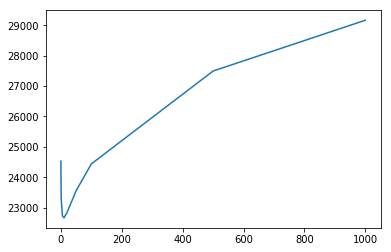

In [32]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
case=[]
from sklearn.linear_model import Ridge
for k in [ 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]:
    clf = Ridge(alpha=k)
    clf.fit(X_train, y_train)
    ypred=clf.predict(X_test)
    rms = math.sqrt(mean_squared_error(ypred,y_test))
    case.append(rms)
k=[0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
plt.plot(k,case)

In [33]:
i=np.argmin(case)
print(case[i])
print(k[i])

22667.95243555616
10


In [34]:
clf = Ridge(alpha=k[i])
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

MSE train: 329615023.10, test: 513836067.62
R^2 train: 0.94, test: 0.91


# 使用Lasso Regression

C:\Users\POPO\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\POPO\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\POPO\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\POPO\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceW

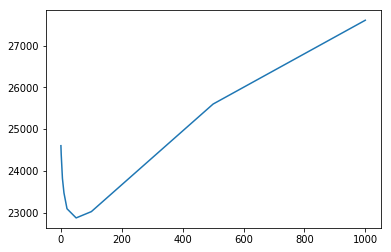

In [35]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
case=[]
from sklearn.linear_model import Lasso
for k in [ 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]:
    clf = Lasso(alpha=k)
    clf.fit(X_train, y_train)
    ypred=clf.predict(X_test)
    rms = math.sqrt(mean_squared_error(ypred,y_test))
    case.append(rms)
k=[0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
plt.plot(k,case)

In [36]:
i=np.argmin(case)
print(case[i])
print(k[i])

22870.566890351845
50


In [37]:
clf = Lasso(alpha=k[i])
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

MSE train: 328164756.11, test: 523062829.89
R^2 train: 0.94, test: 0.91


C:\Users\POPO\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# 使用Neural Network

In [40]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers, initializers
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=3, verbose=0)
model = Sequential()
n_cols = X_train.shape[1]
#add model layers
model.add(Dense(50, activation='relu', input_shape=(n_cols,),kernel_initializer="he_normal"))
model.add(Dense(50, activation='relu',kernel_initializer="he_normal"))
model.add(Dense(50, activation='relu',kernel_initializer="he_normal"))
model.add(Dense(50, activation='relu',kernel_initializer="he_normal"))
model.add(Dense(50, activation='relu',kernel_initializer="he_normal"))
model.add(Dense(50, activation='relu',kernel_initializer="he_normal"))
model.add(Dense(50, activation='relu',kernel_initializer="he_normal"))
model.add(Dense(50, activation='relu',kernel_initializer="he_normal"))
model.add(Dense(1))

#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')
#train model
model.fit(X_train,y_train, epochs=1000,callbacks=[early_stopping],batch_size=64)

Epoch 1/1000
1051/1051 [==============================] - 1s 592us/step - loss: 37022121220.1408
Epoch 2/1000
1051/1051 [==============================] - 0s 138us/step - loss: 21615199424.1827
Epoch 3/1000
1051/1051 [==============================] - 0s 132us/step - loss: 6271634131.9125
Epoch 4/1000
1051/1051 [==============================] - 0s 138us/step - loss: 4395807452.6813
Epoch 5/1000
1051/1051 [==============================] - 0s 132us/step - loss: 3710943312.8677
Epoch 6/1000
1051/1051 [==============================] - 0s 140us/step - loss: 3219488694.4396
Epoch 7/1000
1051/1051 [==============================] - 0s 136us/step - loss: 2683115343.6499
Epoch 8/1000
1051/1051 [==============================] - 0s 135us/step - loss: 2322166257.6289
Epoch 9/1000
1051/1051 [==============================] - 0s 136us/step - loss: 2026641772.2702
Epoch 10/1000
1051/1051 [==============================] - 0s 136us/step - loss: 1835610596.5975
Epoch 11/1000
1051/1051 [============

In [41]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

MSE train: 1043999356.35, test: 1252172929.61
R^2 train: 0.80, test: 0.78


In [42]:
#用神經網路訓練的不夠理想的原因推測可能是資料量實在太少